`torchvision` - Base Domain Library for Pytorch Computer Vision.

`torchvision.datasets` - Get Datasets and data loading functions for computer vision here. 

`torchvision.models` - Get pre-trained computer vision models that you can leverage for your own problems.

`torchvision.transforms` - Functions for manipulating your vision data (images) to be suitable for use with 
                               an ML model.
                               
`torch.utils.data.Dataset` - Base dataset class for Pytorch.

`torch.utils.data.DataLoader` - Creates a Python iterable over a dataset.

In [1]:
import torch
import torch.nn as nn
import torchvision
from torchvision import datasets, models, transforms
from torch.utils.data import Dataset, DataLoader

import matplotlib.pyplot as plt
import os

# 1. Getting a Dataset

The dataset we are using is Fashion MNIST Dataset from torchvision.datasets

In [2]:
train_data = datasets.FashionMNIST(root = "Datasets", train = True, download = True, 
                                   transform = transforms.ToTensor(),   # how do want to transform the data
                                   target_transform = None) # How do we want to transforms the label/targets?


test_data = datasets.FashionMNIST(root = "Datasets", train = False, download = True, 
                                   transform = transforms.ToTensor(),   # how do want to transform the data
                                   target_transform = None) # How do we want to transforms the label/targets?

In [3]:
len(train_data), len(test_data)

(60000, 10000)

In [4]:
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [5]:
train_data.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
train_data.class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [7]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

# 2. Check the Shape of Data

In [8]:
image.shape, label

(torch.Size([1, 28, 28]), 9)

# 3. Visualize the Dataset

In [9]:
image.shape

torch.Size([1, 28, 28])

In [10]:
image.squeeze().shape

torch.Size([28, 28])

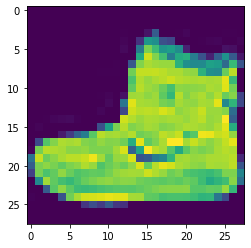

In [11]:
image, label = train_data[0]
plt.imshow(image.squeeze())   # squeeze to get rid of that extra dimension that is channel dimension
plt.show()

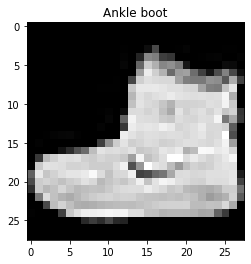

In [12]:
plt.imshow(image.squeeze(), cmap = "gray")  
plt.title(train_data.classes[label])
plt.show()

# 4. Prepare DataLoader

Right now, our data is in the form of Pytorch Datasets.

DataLoader turns our dataset into a Python iterable.

More Specifically, we want to turn our data into batches (or mini-batches).

Why would we do this?

     1) It is more computationally efficient, as in, your computing hardware may not be able to look (store in               memory) at 60000 images in one hit. So we break it down to 32 images at a time (batch size of 32).
     
     2) It gives our neural network more chances to update its gradients per epoch.

In [13]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: Datasets
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: Datasets
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [14]:
BATCH_SIZE = 32

# Turn datasets into iterables (batches)

train_dataloader = DataLoader(dataset = train_data,
                              batch_size = BATCH_SIZE,
                              shuffle = True)

test_dataloader = DataLoader(dataset = test_data,
                             batch_size = BATCH_SIZE,
                             shuffle = False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7fc488520460>,
 <torch.utils.data.dataloader.DataLoader at 0x7fc488520c70>)

In [15]:
len(train_dataloader), len(test_dataloader)

(1875, 313)

In [16]:
60000/32, 10000/32

(1875.0, 312.5)

# 5. Building a Model

In [17]:
class FashionMNISTModelV0(nn.Module):
    def __init__(self,
                 input_shape: int,
                 hidden_shape: int,
                 output_shape: int):
        super().__init__()
        
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features = input_shape, out_features = hidden_shape),
            nn.Linear(in_features = hidden_shape, out_features = output_shape)
            )
        
    def forward(self, x):
        return self.layer_stack(x)

In [18]:
model_0 = FashionMNISTModelV0(input_shape = 784,  # this is 28*28
                              hidden_shape = 16,
                              output_shape = len(train_data.class_to_idx)).to("cpu")



In [19]:
model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=16, bias=True)
    (2): Linear(in_features=16, out_features=10, bias=True)
  )
)

In [20]:
# testing our mode
dummy_x = torch.rand([1, 1, 28, 28])
print(model_0(dummy_x))
print()
print(model_0(dummy_x).shape)

tensor([[-0.0204, -0.2367,  0.2342,  0.0310,  0.0227, -0.0970,  0.2339,  0.0446,
          0.0219, -0.2840]], grad_fn=<AddmmBackward0>)

torch.Size([1, 10])


Model is working, lets go Ahead !!!

# 6. Pickup Loss Function, Optimizer, Evaluation Metrics

In [23]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_0.parameters(),
                        lr = 0.01)

# 7. Creating a Training and Testing Loop on bacthes of data

1. Loop through Epochs.
2. Loop through training batches, perform training steps, calculate the train loss per batch.
3. Loop through testing batches, perform testing steps, calculate the test loss per batch.
4. Print out what's happening.

In [26]:
from tqdm.auto import tqdm

# set the no of epochs
EPOCHS = 5
    
# Create training and testing loop
for epoch in tqdm(range(EPOCHS)):
    
    ### Training
    train_loss = 0
    
    # Add a loop to loop through training batches
    for batch, (X, Y) in enumerate(train_dataloader):
        model_0.train()   # training mode ON
        
        # 1. Forward pass
        Y_pred = model_0(X)
        
        # 2. Calculate loss (per batch)
        
        loss = loss_fn(Y_pred, Y)
        train_loss += loss 
        
        # 3. Optimizer zero grad
        optimizer.zero_grad()
        
        # 4. Loss backward
        loss.backward()
        
        # Optimizer step
        optimizer.step()
        
        # Print out what's happening
        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)} / {len(train_dataloader.dataset)} samples.")
    
    # Divide total train_loss by length of train_dataloader
    train_loss /= len(train_dataloader)   # finding ot avg train loss
    
    
    
    
    ### Testing
    model_0.eval() # Testing Mode ON
    
    test_loss, test_acc = 0, 0
    
    with torch.inference_mode():
        for X_test, Y_test in test_dataloader:
            
            # 1. Forward pass
            test_pred = model_0(X_test)
            
            # 2. Calculate loss (accumulatively)
            test_loss += loss_fn(test_pred, Y_test)
            
            # 3. Calculate Accuracy
            test_acc += accuracy_fn(y_true = Y_test, y_pred = test_pred.argmax(dim = 1))
            
        # Calculate the test loss avg. per batch
        test_loss /= len(test_dataloader)
        
        # Calculate the test acc avg. per batch
        test_acc /= len(test_dataloader)
        
        
        
        
    # Print out what's happening
    print(f"\nTrain Loss: {train_loss:.4f} | Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.2f}")
    print()

  0%|          | 0/5 [00:00<?, ?it/s]

Looked at 0 / 60000 samples.
Looked at 12800 / 60000 samples.
Looked at 25600 / 60000 samples.
Looked at 38400 / 60000 samples.
Looked at 51200 / 60000 samples.

Train Loss: 0.4381 | Test Loss: 0.4698, Test Acc: 83.40

Looked at 0 / 60000 samples.
Looked at 12800 / 60000 samples.
Looked at 25600 / 60000 samples.
Looked at 38400 / 60000 samples.
Looked at 51200 / 60000 samples.

Train Loss: 0.4318 | Test Loss: 0.4628, Test Acc: 83.65

Looked at 0 / 60000 samples.
Looked at 12800 / 60000 samples.
Looked at 25600 / 60000 samples.
Looked at 38400 / 60000 samples.
Looked at 51200 / 60000 samples.

Train Loss: 0.4264 | Test Loss: 0.4553, Test Acc: 83.93

Looked at 0 / 60000 samples.
Looked at 12800 / 60000 samples.
Looked at 25600 / 60000 samples.
Looked at 38400 / 60000 samples.
Looked at 51200 / 60000 samples.

Train Loss: 0.4220 | Test Loss: 0.4515, Test Acc: 84.05

Looked at 0 / 60000 samples.
Looked at 12800 / 60000 samples.
Looked at 25600 / 60000 samples.
Looked at 38400 / 60000 sampl

# 8. Building a Better Model with Non-Linearity

In [37]:
# writing a device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cpu


In [57]:
# Create a model with non-linear and linear layers

class FashionMNISTModelV1(nn.Module):
    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int):
        super().__init__()
        
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features = input_shape, out_features = hidden_units),
            nn.ReLU(),
            nn.Linear(in_features = hidden_units, out_features = output_shape)
            )
        
    def forward(self, x):
        return self.layer_stack(x)
        

In [58]:
model_1 = FashionMNISTModelV1(input_shape = 784, 
                              hidden_units = 16, 
                              output_shape = len(train_data.class_to_idx)
                             ).to(device)

model_1

FashionMNISTModelV1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=16, bias=True)
    (2): ReLU()
    (3): Linear(in_features=16, out_features=10, bias=True)
  )
)

In [59]:
# Pickup Loss Function, Optimizer, Evaluation Metrics
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_0.parameters(),
                        lr = 0.01)

Creating a Training and Testing Loop on bacthes of data.

Lets functionize this:-

1) Training Loop - train_step()

2) Testing Loop - test_loop()

In [60]:
def train_step(model: torch.nn.Module, 
               data_loader: torch.utils.data.DataLoader,
               loss: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    
    train_loss, train_acc = 0, 0
    
    model.train()   # training mode ON
    
    
    # Add a loop to loop through training batches
    for batch, (X, Y) in enumerate(data_loader):
        
        X, Y = X.to(device), Y.to(device)
        
        # 1. Forward pass
        Y_pred = model(X)
        
        # 2. Calculate loss (per batch)
        
        loss = loss_fn(Y_pred, Y)
        train_loss += loss 
        train_acc += accuracy_fn(y_true = Y, y_pred = Y_pred.argmax(dim = 1))
        
        # 3. Optimizer zero grad
        optimizer.zero_grad()
        
        # 4. Loss backward
        loss.backward()
        
        # Optimizer step
        optimizer.step()
        
    
    # Divide total train_loss and acc by length of train_dataloader
    train_loss /= len(data_loader)   # finding ot avg train loss
    train_acc /= len(data_loader)    # finding ot avg train acc

    print(f"Train Loss: {train_loss:.5f} | Train Acc: {train_acc:.2f}%")

In [61]:
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    
    test_loss, test_acc = 0, 0
    
    model.eval()  # put the model in Eval
    
    with torch.inference_mode():
        for X,Y in data_loader:
            X, Y = X.to(device), Y.to(device)
            
            # 1. Forward Pass
            test_pred = model(X)
            
            # 2. Calculate the loss/acc
            test_loss += loss_fn(test_pred, Y)
            test_acc += accuracy_fn(y_true = Y, y_pred = test_pred.argmax(dim = 1))
            
            
        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        
        print(f"Test Loss: {test_loss:.5f} | Test Acc: {test_acc:.2f}%\n")

In [64]:
# Start the training and testing

EPOCHS = 5

for epoch in tqdm(range(EPOCHS)):
    print(f"Epoch: {epoch}\n---------")
    train_step(model = model_1,
               data_loader = train_dataloader,
               loss = loss_fn,
               optimizer = optimizer,
               accuracy_fn = accuracy_fn,
               device = device)
    
    test_step(model = model_1,
              data_loader = test_dataloader,
              loss = loss_fn,
              accuracy_fn = accuracy_fn,
              device = device)

  0%|          | 0/5 [00:00<?, ?it/s]

Train Loss: 2.31074 | Train Acc: 6.49%
Test Loss: 2.31171 | Test Acc: 6.35%

Train Loss: 2.31075 | Train Acc: 6.49%
Test Loss: 2.31171 | Test Acc: 6.35%

Train Loss: 2.31074 | Train Acc: 6.49%
Test Loss: 2.31171 | Test Acc: 6.35%

Train Loss: 2.31074 | Train Acc: 6.49%
Test Loss: 2.31171 | Test Acc: 6.35%

Train Loss: 2.31074 | Train Acc: 6.49%
Test Loss: 2.31171 | Test Acc: 6.35%



# Non linear model isnt giving Good Results in this particular Test Case !!!
# Lets try to use CNN in the Next Part !!!